In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore

In [193]:
df=pd.read_csv('Advertising.csv') # loading the dataset into dataframe
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Data Preprocessing

In [194]:
df.isnull().sum()#checking the nuul values

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Found that there is no null values 

In [195]:
df.shape # checking the length of data

(200, 5)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Checked that data types of data , found all number so, we can go for EDA

In [197]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [198]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# EDA 

<AxesSubplot:ylabel='Count'>

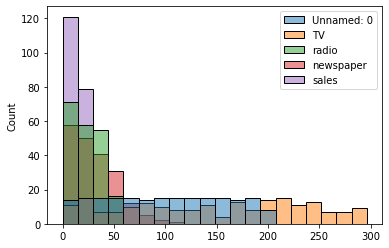

In [199]:
sns.histplot(df)

Using the histogram of dataset we found that the dataset needs scaling 

<AxesSubplot:xlabel='TV', ylabel='Count'>

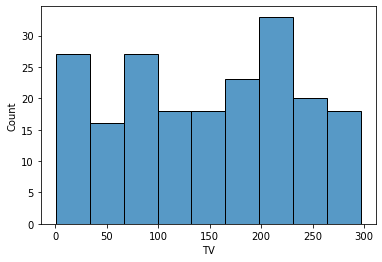

In [200]:
sns.histplot(x='TV',data=df)

It is found the expenditure on TV is maximum 296$. And maximum number of the expenditure 
lies between 200 and 250.

<AxesSubplot:xlabel='radio', ylabel='Count'>

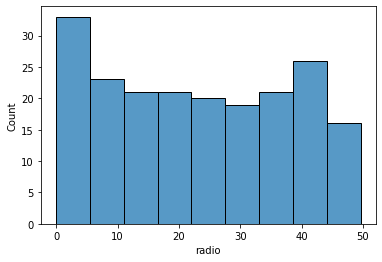

In [201]:
sns.histplot(x='radio',data=df)

The expenditure on radio has been upto 48$. Comparitively less expenditure. Max occurance < 5$

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

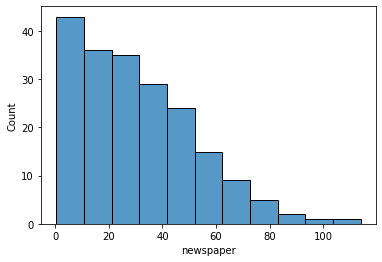

In [202]:
sns.histplot(x='newspaper',data=df)

the expenditure in newspaper also less

<AxesSubplot:xlabel='TV', ylabel='Density'>

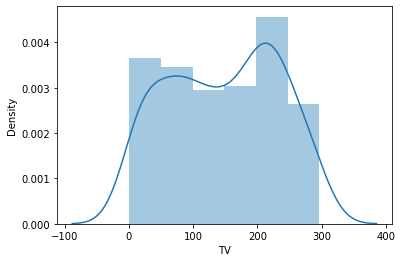

In [203]:
sns.distplot(df['TV'])

The distribution not in bell shape but in accepting stage

<AxesSubplot:xlabel='radio', ylabel='Density'>

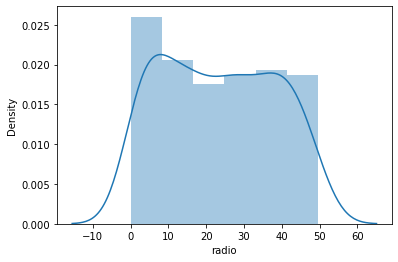

In [204]:
sns.distplot(df['radio'])

The distribution is acceptable.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

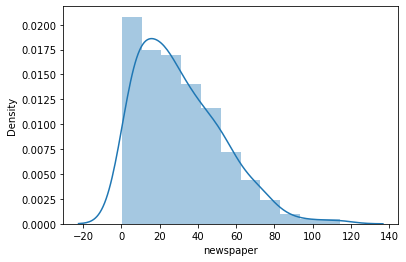

In [205]:
sns.distplot(df['newspaper'])

There is little skewness in the dataset

In [206]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

Text(0.5, 1.0, 'Correlation of Features')

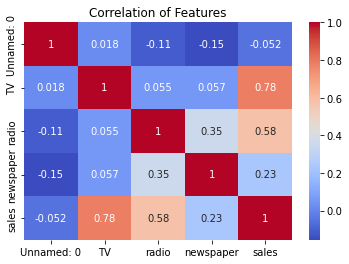

In [207]:
sns.heatmap(df.corr(),color='Blue',annot=True,cmap='coolwarm')
plt.title('Correlation of Features')

(i) There hight correlation between TV and Sales
(ii) There is modarate correlation between Radio and Sales
(iii) There is very less positive realtion betweeen Newspaper and sales

<AxesSubplot:xlabel='TV', ylabel='sales'>

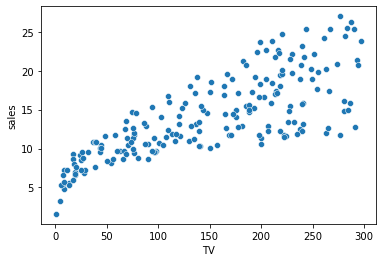

In [208]:
sns.scatterplot(x='TV',y='sales',data=df)

the more expenditure on TV advertising the sales will also incease

<AxesSubplot:xlabel='radio', ylabel='sales'>

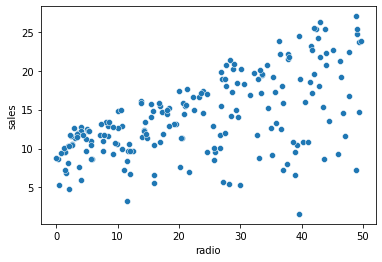

In [209]:
sns.scatterplot(x='radio',y='sales',data=df)

The relation between radio and sales is little scattered

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

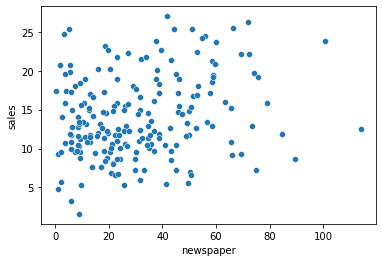

In [210]:
sns.scatterplot(x='newspaper',y='sales',data=df)

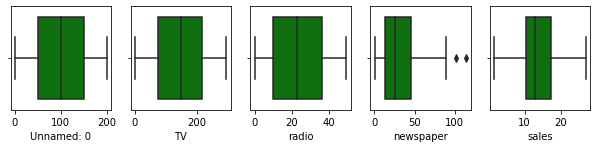

In [211]:
cols=df.columns.values
plt.figure(figsize=(50,30))
for i in range(0,len(cols)):
    plt.subplot(15,30,i+1)
    sns.boxplot(df[cols[i]],color='green',orient='v')
    plt.tight_layout()

There is outliers present in newspaper

In [220]:
from scipy.stats import zscore  
z=np.abs(zscore(df))
z.shape

(200, 4)

In [221]:
threshold=3  # set zscore =3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [222]:
df_new=df[(z<3).all(axis=1)] # removed the outliers more than 3
print(df.shape)
print(df_new.shape)

(200, 4)
(198, 4)


In [223]:
loss=(200-198)/200*100 # checking the loss percentage
print(loss)

1.0


In [224]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

After removing the outliers we found the loss is 1 % only

# Feature Engineering

In [214]:
df.rename({"Unnamed: 0":"a"},axis="columns",inplace=True)
df.drop('a',axis=1,inplace=True)

In [225]:
x=df.drop('sales',axis=1)
y=df['sales']

In [226]:
x.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

found skewness in newspaper 

In [227]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')

In [228]:
x=scaler.fit_transform(x)
x=pd.DataFrame(x,columns=['TV','radio','newspaper'])

# Scaling of Data

In [229]:
from sklearn.preprocessing import StandardScaler # applying standard scaling
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,TV,radio,newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704


# Splitting of data

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


There is very little relationship between sales and newspaper

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
maxAcc=0
maxRS=0
# choosing the best random state for our ML Model
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i

print("Maximum r2 score is ",maxAcc," on Random State",maxRS)

Maximum r2 score is  0.9365299574494778  on Random State 13


Found ramdom state 13 is best for splitting the data

In [284]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=13)

Splitted the x and y into train and test for model testing 

# Fiiting of Model

In [237]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [272]:
def model_test(model,x,y):
    model.fit(x,y)
    pred=model.predict(x_test)
    print('R2_score:',r2_score(y_test,pred))
    print(mean_absolute_error(y_test,pred))
    print(mean_squared_error(y_test,pred))

Defined a model for regression model

In [273]:
lr=LinearRegression()
model_test(lr,x_train,y_train)

R2_score: 0.9365299574494778
1.1219718986672667
2.0113111699728603


In [274]:
rfr=RandomForestRegressor()
model_test(rfr,x_train,y_train)

R2_score: 0.9766249764312013
0.6695000000000012
0.7407344333333354


In [275]:
dtr=DecisionTreeRegressor()
model_test(dtr,x_train,y_train)

R2_score: 0.9680910679972662
0.7983333333333333
1.011166666666666


In [276]:
knn=KNN()
model_test(knn,x_train,y_train)

R2_score: 0.9463810027462088
0.9469999999999997
1.69914


In [277]:
svr=SVR()
model_test(svr,x_train,y_train)

R2_score: 0.8712536486569008
1.233823424518204
4.07986136677791


In [278]:
SGD=SGDRegressor()
model_test(SGD,x_train,y_train)

R2_score: 0.9363157678932121
1.127394384016057
2.0180986531648832


In [283]:
print('LR',cross_val_score(lr,x,y,cv=5).mean())
print('RFR',cross_val_score(rfr,x,y,cv=5).mean())
print('DTR',cross_val_score(dtr,x,y,cv=5).mean())
print('KNN',cross_val_score(knn,x,y,cv=5).mean())
print('SVR',cross_val_score(svr,x,y,cv=5).mean())
print('SGD',cross_val_score(SGD,x,y,cv=5).mean())

LR 0.8978060430607071
RFR 0.9748454864445403
DTR 0.9533236455785294
KNN 0.9437503201014801
SVR 0.9171386899137435
SGD 0.8981776035435447


After cross validation test we found the Random Forest Regressor is the best model to fit with 97% accuracy

# Hyper parameter Tuning

In [281]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2'],
           'min_samples_split':[0,1,2,3,4,5,10,20],
           'max_depth':[2,4,6]}
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)
print('Best Parameters',GCV.best_params_)

Best Parameters {'criterion': 'mae', 'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 3}


We got the best parameters for the RFR model

In [282]:
fin_model=RandomForestRegressor(criterion='mae',max_depth=6,max_features='auto',min_samples_split=3)
model_test(fin_model,x_train,y_train)

R2_score: 0.9756342799597233
0.6794416666666674
0.7721287541666675


# Saving the model

In [286]:
import joblib
joblib.dump(fin_model,'Advertising.obj')

['Advertising.obj']